# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorboard

from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
tf.__version__

'2.3.1'

In [19]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

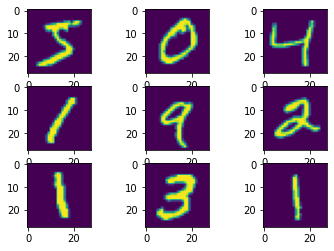

(60000, 28, 28)

In [20]:
# from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# show the first 9 hand-written digits
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [21]:
X_train_full.shape

(60000, 28, 28)

In [22]:
# normalization
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [23]:
print(y_train_full[0])

# convert a class vector to one-hot encoding matrix
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train_full[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# get validation dataset
np.random.seed(42)
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Build and train the model

Build and train your model. 

In [25]:
# TODO: Build your model
# the model starts with a layer with 28 x 28

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    Flatten(input_shape=[28, 28]), 
    Dense(units=300, activation='relu'), 
    Dense(units=100, activation='relu'), 
    Dense(units=10, activation='softmax')
])

In [26]:
# show the structure of your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Compile and train the model

In [27]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [28]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    verbose=1
)

# Reduce Learning Rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=0.3, 
    verbose=1
)

In [29]:
history = model.fit(X_train, y_train, batch_size=30, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30
1834/1834 [==============================] - 8s 4ms/step - loss: 0.2167 - accuracy: 0.9354 - val_loss: 0.1123 - val_accuracy: 0.9656
Epoch 2/30
1834/1834 [==============================] - 5s 2ms/step - loss: 0.0880 - accuracy: 0.9725 - val_loss: 0.0787 - val_accuracy: 0.9768
Epoch 3/30
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0757 - val_accuracy: 0.9776
Epoch 4/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0729 - val_accuracy: 0.9792
Epoch 5/30
1834/1834 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9888
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0779 - val_accuracy: 0.9766
Epoch 6/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss

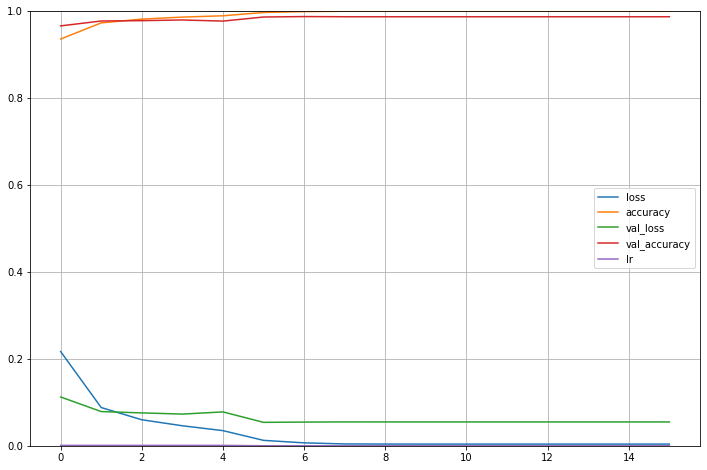

In [30]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9857


[0.05643133446574211, 0.9857000112533569]

## Make predictions

In [32]:
y_prob = model.predict(X_test[:3])
y_prob.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Save the model

In [34]:
model.save('mnist.h5') 

## Load the model and evaluate it on the test data

In [35]:
model = keras.models.load_model("mnist.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9857


[0.05643133446574211, 0.9857000112533569]

## Short report

For this task, I just need to build fully connected layers. The input layer and the output layer are fixed since we have 28x28-pixel handwritten digits as input and 10 categories as output. I only have to build hidden layers. This task was quite straightforward. I only used two hidden layers in this model. The number of neurons for each hidden layer forms a pyramid. This structure used to be popular in the past. Nowadays it is the common practice to use the same number of neurons in all hidden layers. But the old-fashioned structure still worked pretty well in my model. The reason why I chose two hidden layers and 300 neurons and 100 neurons for each hidden layer is that I tried different combinations several times and found this one worked well.